# <center>Breast Cancer Classification</center>

<em>Note: We first created a virtual environment (using Windows PowerShell), which allowed the <b>"requirements.txt"</b> file to only contain the dependencies (libraries) that had been installed in the virtual environment and were required for the current project to run.</em>

In [ ]:
####### Install packages
# pip install pandas
# pip install scikit-learn
# pip install matplotlib
# pip install seaborn
# pip install statsmodels
# pip install scikit-plot
# pip install plot-metric

In [ ]:
####### Save all the packages in the "requirements.txt" file 
# pip freeze > requirements.txt

By running the command below, you can install dependencies from <b>"requirements.txt"</b>

In [ ]:
# pip install -r requirements.txt

## Step 1: Dataset & Dependencies

In [1]:
####### Import Packages
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import scikitplot as skplt
import seaborn as sns
import sklearn
from collections import Counter
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.datasets import load_breast_cancer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from matplotlib.ticker import FuncFormatter

In [2]:
# Import data (imported as a dictionary)
data = load_breast_cancer()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


* data: It is mostly features in the dataset that would help classify a scan as benign or malignant. 

* target_names: Name of the target variable.

* DESCR: Data description.

* feature_names: All the features available in this dataset (radius, texture, compactness, concavity, concave points, perimeter, area, smoothness, etc.)

* filename: Data is in CSV format.

In [3]:
print (data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
print (data.feature_names)
print (data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [5]:
###### Load the dataset into a dataframe
# Read the dataframe, first using the feature data
df = pd.DataFrame(data.data, columns=data.feature_names)
# Add a target column, and fill it with the target data
df['target'] = data.target
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


### <ins>Dataset dimensions</ins>

In [6]:
# Shape of the dataset
print("Breast cancer data set dimensions : {}".format(df.shape))
# The data are comprised of 569 rows, 30 input variables and one target variable

Breast cancer data set dimensions : (569, 31)


### <ins>Data types per attribute</ins>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Step 2: Exploratory Analysis

### <ins>Statistical summary per attribute</ins>

In [8]:
pd.set_option('display.max_columns', None)
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### <ins>Class Distribution</ins>

"Target" is the column which we are going to predict , which says 
* if the cancer is Malignant (target=0) 
* or Benign (target = 1).  

In [9]:
print(df['target'].nunique()) # Count distict values

2


In [10]:
## Label target variable values (for vizualization purposes)
df_temp = df.copy()
df_temp['Diagnosis'] = 'Error'
df_temp['Diagnosis'] = np.where(df_temp['target']==0, 'Malignant', 'Benign')
df_temp.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,Diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,Malignant
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,Malignant
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,Malignant


In [11]:
dict2 = pd.Series(df_temp.target.values,index=df_temp.Diagnosis).to_dict()
sort_dict = sorted(dict2.items(), key=lambda x: x[1])
sort_dict

[('Malignant', 0), ('Benign', 1)]

In [12]:
target = df_temp[['Diagnosis']]
count42 = np.array(np.unique(df_temp[['Diagnosis']], return_counts=True)).T
count42 = pd.DataFrame(count42)  
count42.rename(columns={0: "Diagnosis",1:"Count"}, inplace=True) 
pct = 100*(count42[['Count']]/len(target))
count42[['Percentage']] = pct.astype(float).round(1)
count42

,Diagnosis,Count,Percentage
0,Benign,357,62.7
1,Malignant,212,37.3


We can identify that out of the 569 cancer tumors, 357 are labeled as Benign (target=1) and 212 as Malignant (target=0).

The class distribution is then summarized, confirming the class imbalance with:
* approximately 63% for the majority class (Benign) 
* and approximately 37% for the minority class (Malignant)

So, we noticed that approximately 63% of the cancer tumors were benign and 37% of them were malignant. As a result, we may claim that we had a (slightly) imbalanced dataset. Generally, imbalanced classifications pose a challenge for predictive modeling (e.g., Accuracy Paradox), because most classification algorithms were designed based on the assumption of having an equal number of observations for each class.  So, models with poor predictive performance, particularly for minorities, are produced.

Hence, this benchmark was essentially a baseline result (i.e. the simplest possible prediction) which could be used as a point of reference for comparing our classification algorithms. 

## <ins>Univariate Analysis</ins>

### Barplot for the target variable

[Text(0, 0, '62.7%'), Text(0, 0, '37.3%')]

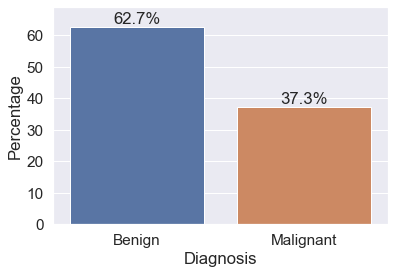

In [14]:
sns.set(font_scale = 1.4) # change fontsize
plot10a = sns.barplot(x = 'Diagnosis',y = 'Percentage',data = count42)
plot10a.margins(y=0.1) # make room for the labels
A_as_ticklabel = [f"{a}%" for a in count42['Percentage']] # add percentage symbol in labels
plot10a.bar_label(plot10a.containers[0], labels=A_as_ticklabel)

### Density plots for each of the 30 input variables

Regarding the distribution of each (numeric) attribute, instead of a histogram we decided to use a density plot (i.e. a variation of a histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise). Density plots return the probability density of the distributions, whereas histograms return the actual frequencies.

So, the main reason why we decided to use density plots over histograms, was because they are better at determining the distribution shape due to the fact that they are not affected by the number of bins used (each bar used in a typical histogram).

* Probality Density Function (PDF) is the probabilty that the variable takes a value x. (smoothed version of the histogram)
* Kernel Density Estimate (KDE) is the way to estimate the PDF. The area under the KDE curve is 1.

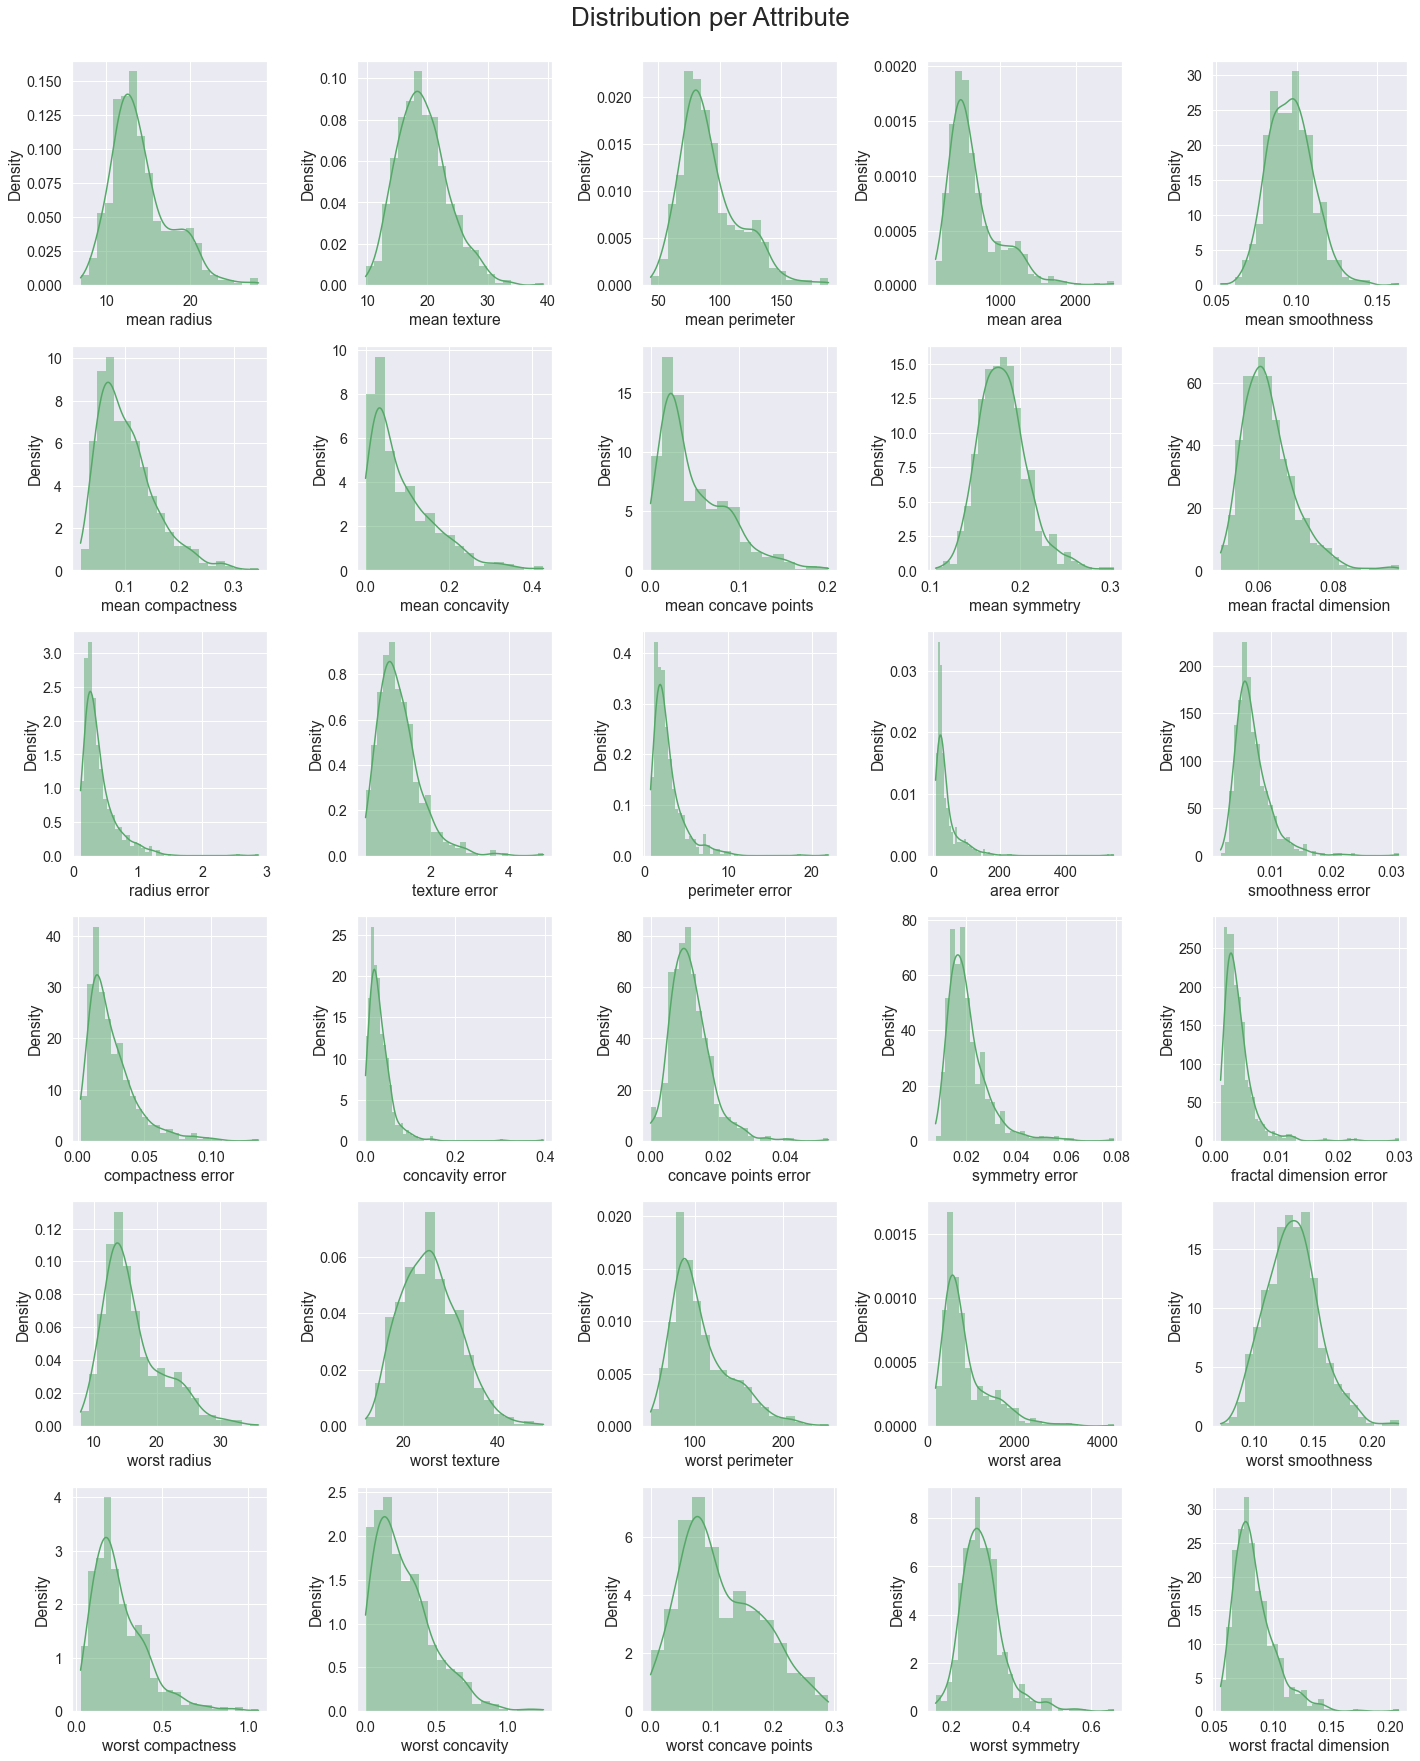

In [15]:
fig = plt.figure(figsize = (20, 25))
sns.set(font_scale = 1.3) # change fontsize in "sns.histplot"
j = 0
for i in df.columns[:-1]:
    plt.subplot(6, 5, j+1)
    j += 1
    sns.histplot(df[i], color='g', kde=True, stat="density", linewidth=0)
fig.suptitle('Distribution per Attribute', fontsize=26)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

### Density plots of mean values per tumor type

In [16]:
df_temp.columns[0:10]   ### Mean values

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension'],
      dtype='object')

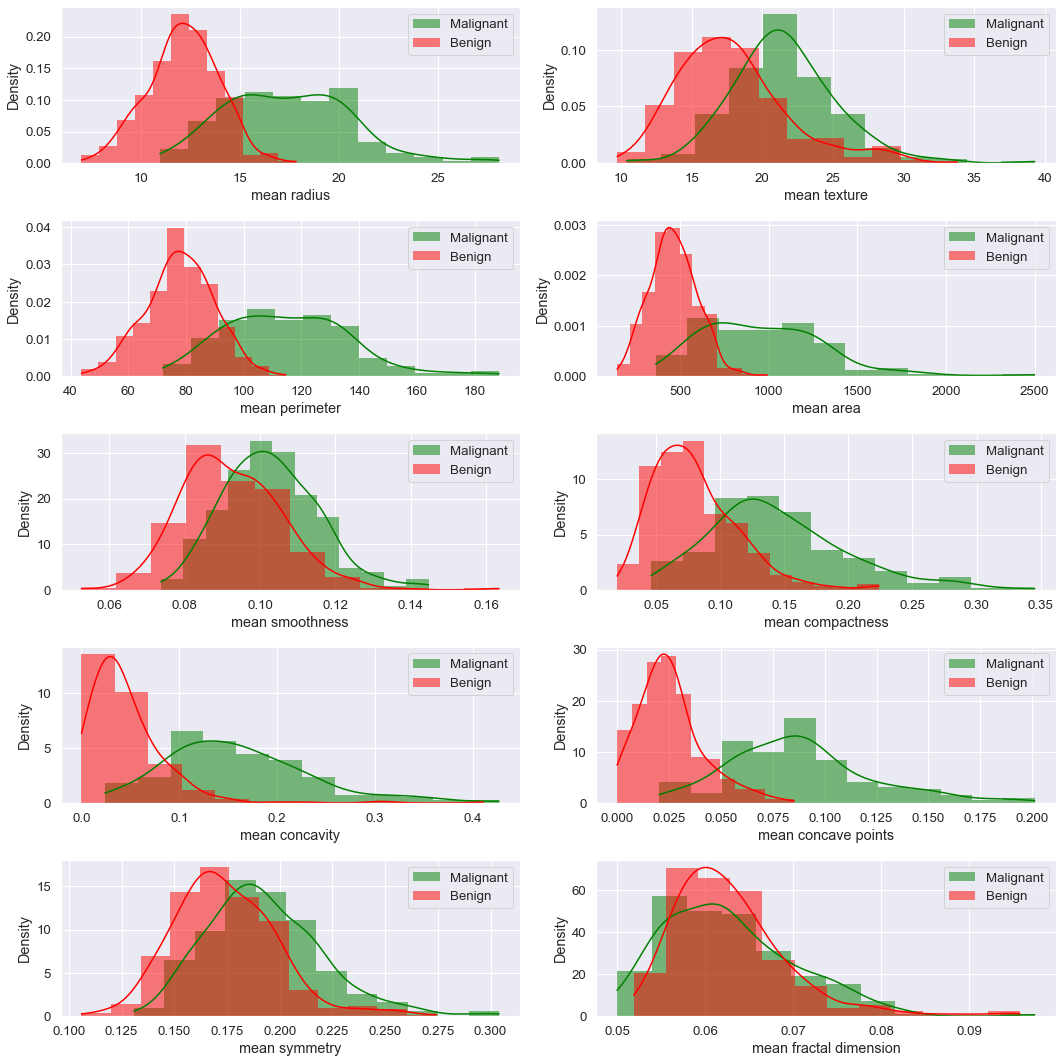

In [17]:
bins = 12
plt.figure(figsize=(15,15))
sns.set(font_scale = 1.2) # change fontsize in "sns.histplot"

plt.subplot(5, 2, 1)
sns.histplot(df_temp[df_temp['Diagnosis']=='Malignant']['mean radius'], bins=bins, color='green', label='Malignant', kde=True, stat="density", linewidth=0)
sns.histplot(df_temp[df_temp['Diagnosis']=='Benign']['mean radius'], bins=bins, color='red', label='Benign', kde=True, stat="density", linewidth=0)
plt.legend(loc='upper right')

plt.subplot(5, 2, 2)
sns.histplot(df_temp[df_temp['Diagnosis']=='Malignant']['mean texture'], bins=bins, color='green', label='Malignant', kde=True, stat="density", linewidth=0)
sns.histplot(df_temp[df_temp['Diagnosis']=='Benign']['mean texture'], bins=bins, color='red', label='Benign', kde=True, stat="density", linewidth=0)
plt.legend(loc='upper right')

plt.subplot(5, 2, 3)
sns.histplot(df_temp[df_temp['Diagnosis']=='Malignant']['mean perimeter'], bins=bins, color='green', label='Malignant', kde=True, stat="density", linewidth=0)
sns.histplot(df_temp[df_temp['Diagnosis']=='Benign']['mean perimeter'], bins=bins, color='red', label='Benign', kde=True, stat="density", linewidth=0)
plt.legend(loc='upper right')

plt.subplot(5, 2, 4)
sns.histplot(df_temp[df_temp['Diagnosis']=='Malignant']['mean area'], bins=bins, color='green', label='Malignant', kde=True, stat="density", linewidth=0)
sns.histplot(df_temp[df_temp['Diagnosis']=='Benign']['mean area'], bins=bins, color='red', label='Benign', kde=True, stat="density", linewidth=0)
plt.legend(loc='upper right')

plt.subplot(5, 2, 5)
sns.histplot(df_temp[df_temp['Diagnosis']=='Malignant']['mean smoothness'], bins=bins, color='green', label='Malignant', kde=True, stat="density", linewidth=0)
sns.histplot(df_temp[df_temp['Diagnosis']=='Benign']['mean smoothness'], bins=bins, color='red', label='Benign', kde=True, stat="density", linewidth=0)
plt.legend(loc='upper right')

plt.subplot(5, 2, 6)
sns.histplot(df_temp[df_temp['Diagnosis']=='Malignant']['mean compactness'], bins=bins, color='green', label='Malignant', kde=True, stat="density", linewidth=0)
sns.histplot(df_temp[df_temp['Diagnosis']=='Benign']['mean compactness'], bins=bins, color='red', label='Benign', kde=True, stat="density", linewidth=0)
plt.legend(loc='upper right')

plt.subplot(5, 2, 7)
sns.histplot(df_temp[df_temp['Diagnosis']=='Malignant']['mean concavity'], bins=bins, color='green', label='Malignant', kde=True, stat="density", linewidth=0)
sns.histplot(df_temp[df_temp['Diagnosis']=='Benign']['mean concavity'], bins=bins, color='red', label='Benign', kde=True, stat="density", linewidth=0)
plt.legend(loc='upper right')

plt.subplot(5, 2, 8)
sns.histplot(df_temp[df_temp['Diagnosis']=='Malignant']['mean concave points'], bins=bins, color='green', label='Malignant', kde=True, stat="density", linewidth=0)
sns.histplot(df_temp[df_temp['Diagnosis']=='Benign']['mean concave points'], bins=bins, color='red', label='Benign', kde=True, stat="density", linewidth=0)
plt.legend(loc='upper right')

plt.subplot(5, 2, 9)
sns.histplot(df_temp[df_temp['Diagnosis']=='Malignant']['mean symmetry'], bins=bins, color='green', label='Malignant', kde=True, stat="density", linewidth=0)
sns.histplot(df_temp[df_temp['Diagnosis']=='Benign']['mean symmetry'], bins=bins, color='red', label='Benign', kde=True, stat="density", linewidth=0)
plt.legend(loc='upper right')

plt.subplot(5, 2, 10)
sns.histplot(df_temp[df_temp['Diagnosis']=='Malignant']['mean fractal dimension'], bins=bins, color='green', label='Malignant', kde=True, stat="density", linewidth=0)
sns.histplot(df_temp[df_temp['Diagnosis']=='Benign']['mean fractal dimension'], bins=bins, color='red', label='Benign', kde=True, stat="density", linewidth=0)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## <ins>Multivariate Analysis</ins>

### => Correlation between target variable and all other attributes

In [18]:
temp_corrs11 = df.corr()['target']   # map features to their absolute correlation values
temp_corrs11[temp_corrs11 == 1] = 0  # set equality (self correlation) as zero
temp_corrs11.sort_values(ascending=True).round(2)[temp_corrs11 != 0]

worst concave points      -0.79
worst perimeter           -0.78
mean concave points       -0.78
worst radius              -0.78
mean perimeter            -0.74
worst area                -0.73
mean radius               -0.73
mean area                 -0.71
mean concavity            -0.70
worst concavity           -0.66
mean compactness          -0.60
worst compactness         -0.59
radius error              -0.57
perimeter error           -0.56
area error                -0.55
worst texture             -0.46
worst smoothness          -0.42
worst symmetry            -0.42
mean texture              -0.42
concave points error      -0.41
mean smoothness           -0.36
mean symmetry             -0.33
worst fractal dimension   -0.32
compactness error         -0.29
concavity error           -0.25
fractal dimension error   -0.08
symmetry error             0.01
texture error              0.01
mean fractal dimension     0.01
smoothness error           0.07
Name: target, dtype: float64

In brief, we observed that some features were highly (negatively) correlated with cancer tumor, while others had had almost zero correlation.

### => Correlation between attributes

We also computed the correlation between all attributes.
For presentation purposes and based on the content of each variable, we decided to compute the correlation between the variables showcasing the:
* mean values
* standard errors
* worst (i.e. largest) values and
* values per attribute (i.e. mean, standard error and largest)

We begun by creating a pairplot, but it was too big and complicated to understand, which is why we decided to create a heatmap instead.

In [19]:
# df.columns[0:10]   ### Mean values
# df.columns[10:20]  ### Standard Errors
# df.columns[20:30]  ### Worst (i.e. largest) values
# df.columns[30]     ### Target value

In [20]:
##### Correlation between the mean values
# sns.pairplot(df.iloc[:,0:10].corr(), diag_kind='kde', height=2)

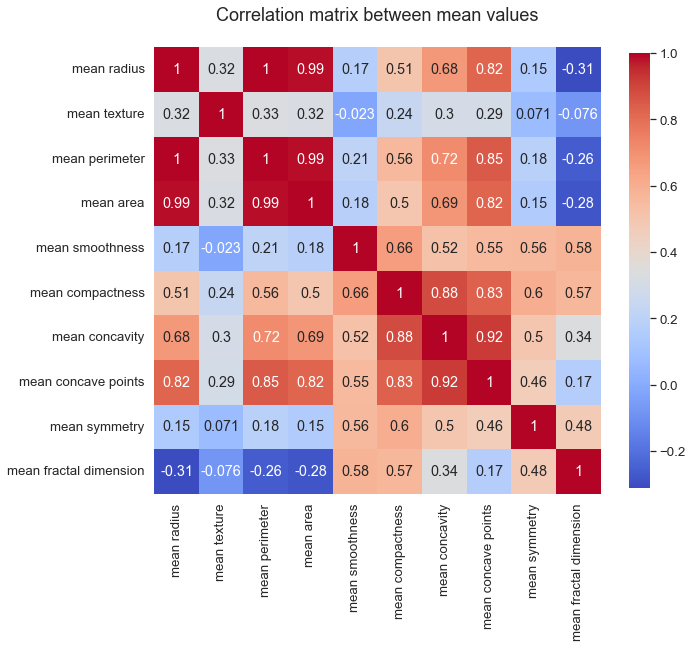

In [21]:
plt.figure(figsize=(10,10))
hm = sns.heatmap(df.iloc[:,0:10].corr(), annot=True, square=True, cmap='coolwarm', cbar_kws={"shrink": 0.8})
hm.axes.set_title("Correlation matrix between mean values\n",fontsize=18)
plt.show()

For example, we observed that mean radius and mean perimeter were perfectly correlated, which was also showcased in the scatterplot below. As a result, a potential usage of both of them in the classification algorithms not only will not offer extra useful information, but also will make them slower, increase harmful bias and reduce the model’s interpretability. 

<AxesSubplot:xlabel='mean radius', ylabel='mean perimeter'>

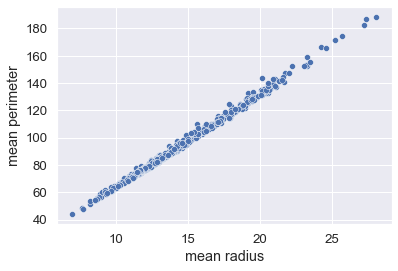

In [22]:
sns.scatterplot(x = 'mean radius',y = 'mean perimeter',data = df)

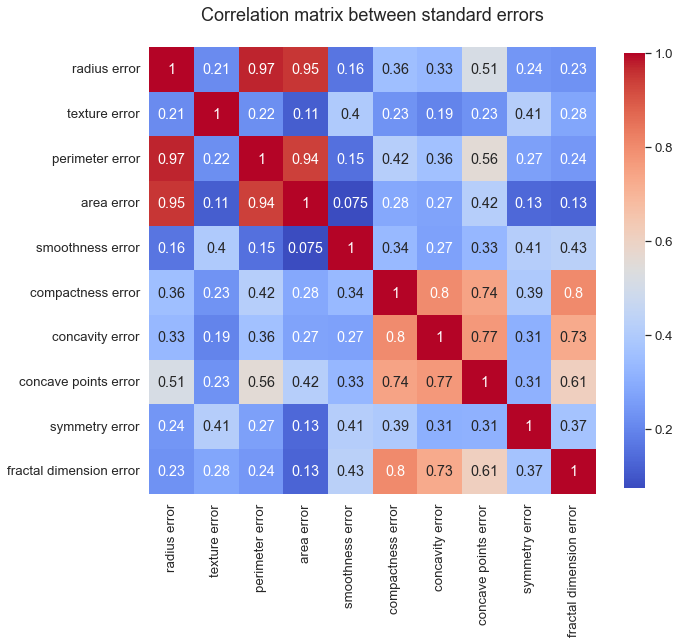

In [23]:
plt.figure(figsize=(10,10))
hm = sns.heatmap(df.iloc[:,10:20].corr(), annot=True, square=True, cmap='coolwarm', cbar_kws={"shrink": 0.8})
hm.axes.set_title("Correlation matrix between standard errors\n",fontsize=18)
plt.show()

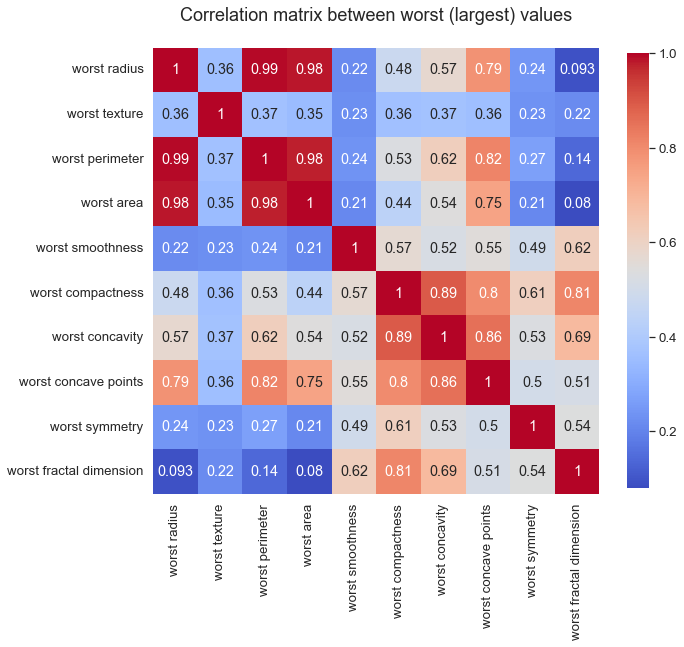

In [24]:
plt.figure(figsize=(10,10))
hm = sns.heatmap(df.iloc[:,20:30].corr(), annot=True, square=True, cmap='coolwarm', cbar_kws={"shrink": 0.8})
hm.axes.set_title("Correlation matrix between worst (largest) values\n",fontsize=18)
plt.show()

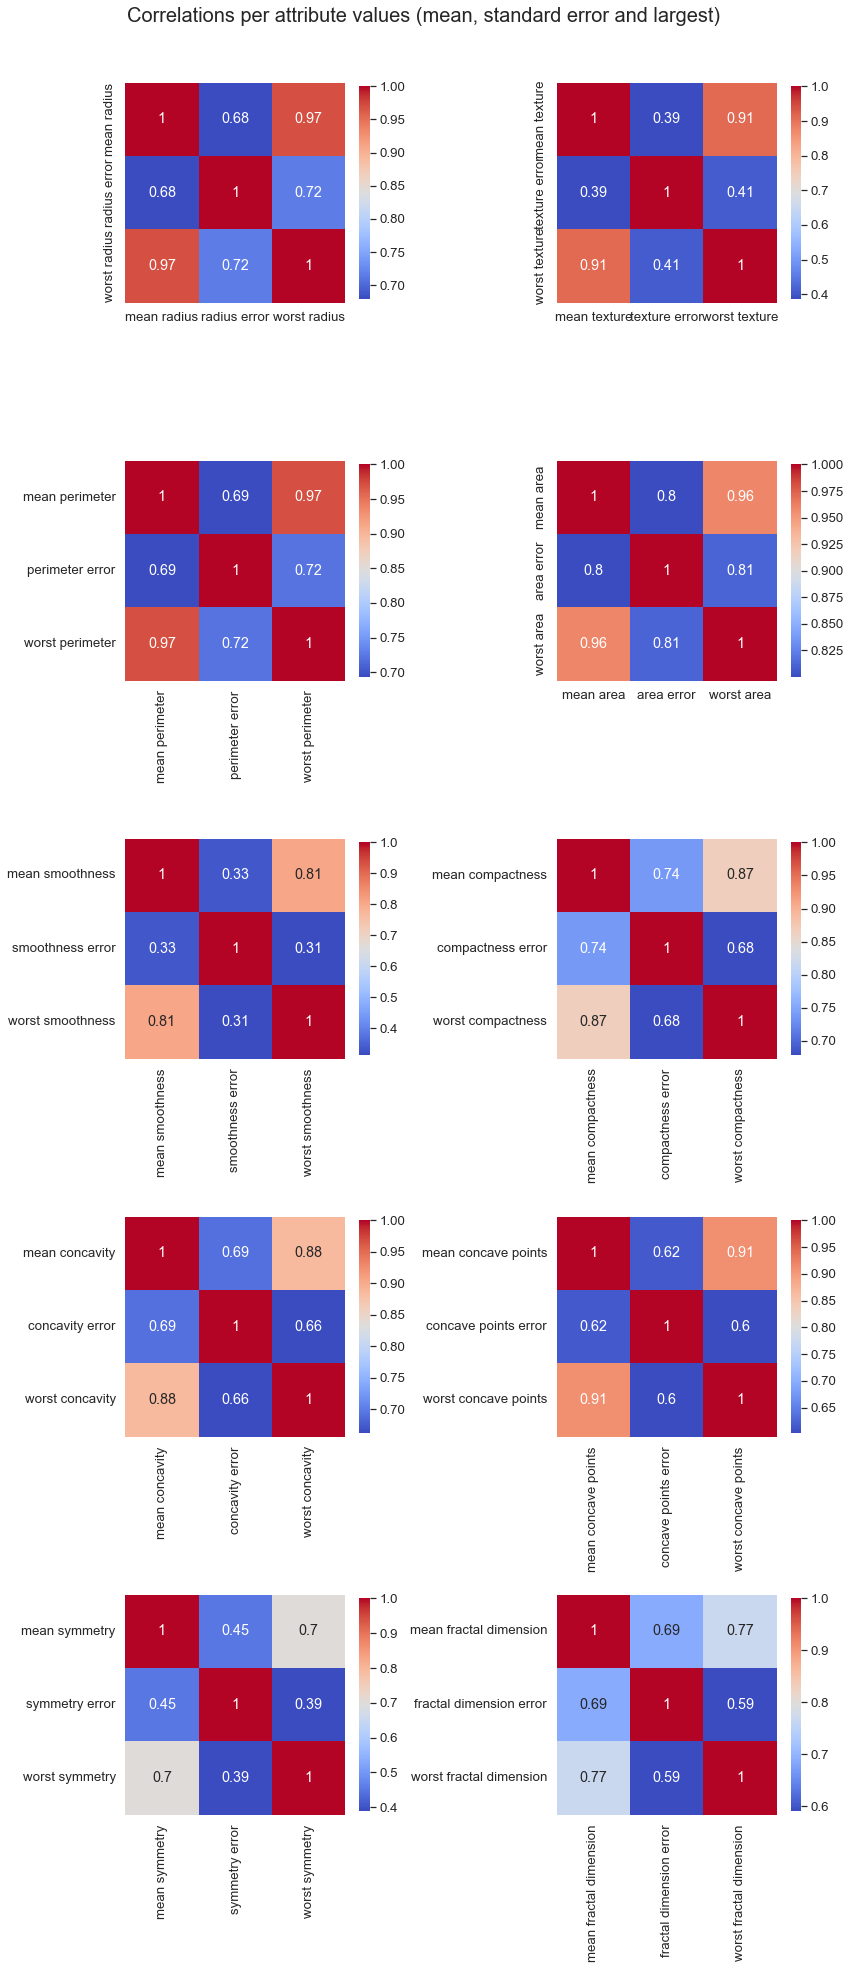

In [25]:
fig = plt.figure(figsize = (12, 28))
j = 0
for i in range(10):
    plt.subplot(5, 2, j+1)
    j += 1
    sns.heatmap(df.iloc[:,[i,i+10,i+20]].corr(), annot=True, square=True, cmap='coolwarm', cbar_kws={"shrink": 0.85})
fig.suptitle('Correlations per attribute values (mean, standard error and largest)', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

## Extra Visualizations
Below, we decided to further analyze some of the (selected) features in order to gain some more insights. 

In particular, we created some visuzalitions regarding the <b>mean radius</b> and <b>mean texture</b> values

<em>Note: Later on our analysis, we have removed the highly correlated features (i.e. the ones whose correlation coefficients were higher or equal than 0.9) and the mean radius, mean perimeter values were among the selected features that will be used in our analysis.</em>

### <ins>(Mean) Radius</ins>

[Text(0, 0, '17.5'), Text(0, 0, '12.1')]

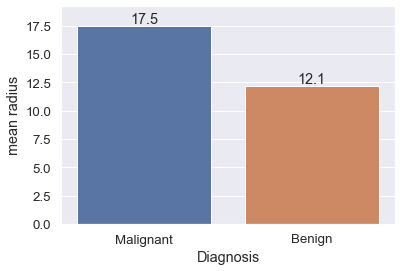

In [26]:
plot12 = sns.barplot(x = 'Diagnosis',y = 'mean radius',data = df_temp, ci=None)
plot12.margins(y=0.1) # make room for the labels
plot12.bar_label(plot12.containers[0], fmt='%.1f') # add labels (rounded to one decimal point)

From the above graph we observed  that malignant cells have a larger radius than benign cells. Hence, there could be a relation between the aforementioned attributes. Furthermore, the approximate mean radius values for malignant and benign cells were 17.5 and 12.1, respectively.

<AxesSubplot:xlabel='Diagnosis', ylabel='mean radius'>

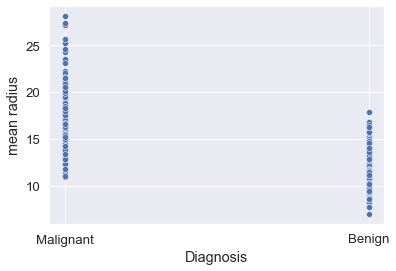

In [27]:
sns.scatterplot(x = 'Diagnosis', y = 'mean radius', data = df_temp)

According to the scatter plot above, not all malignant cells have a larger radius. Some malignant cells have a smaller radius than benign cells. Hence, it cannot be regarded as a single parameter for classification.

In [28]:
radius_mean_M=17.5
radius_mean_B=12.5
radius_M=np.abs(df['mean radius']-radius_mean_M)
radius_B=np.abs(df['mean radius']-radius_mean_B)
New_malignant_number=(radius_M<radius_B).sum()
M_count = count42['Count'][1]
print("Out of a total of {} malignant cells, {} were classified as malignant when only the radius was considered as a measure.".format(M_count, New_malignant_number))

Out of a total of 212 malignant cells, 173 were classified as malignant when only the radius was considered as a measure.


### <ins>(Mean) Texture</ins>

[Text(0, 0, '21.6'), Text(0, 0, '17.9')]

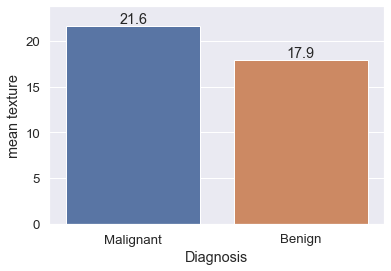

In [29]:
plot13 = sns.barplot(x = 'Diagnosis', y = 'mean texture', data = df_temp, ci=None)
plot13.margins(y=0.1)
plot13.bar_label(plot13.containers[0], fmt='%.1f')

<AxesSubplot:xlabel='Diagnosis', ylabel='mean texture'>

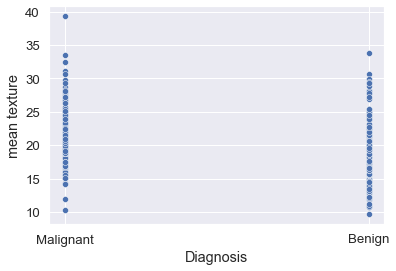

In [30]:
sns.scatterplot(x = 'Diagnosis', y = 'mean texture', data = df_temp)

The above two graphs show that the mean texture of malignant cells differs slightly from that of benign cells (mean texture values for malignant and benign cells are 21.6 and 17.9, respectively), implying that there is probably no relationship between the aforementioned attributes. In addition, the range of their values was nearly identical. As a result, unlike radius, texture may not be a significant classification parameter.

## Step 3: Data Preparation

In [ ]:
######### df = np.nan_to_num(df)
# numpy.nan_to_num: 
# Replace NaN with zero and infinity with large finite numbers (default behaviour) or 
# with the numbers defined by the user using the nan, posinf and/or neginf keywords.

In [31]:
# isnull(), isna() indicates whether values NaN or None
# isnull() is just an alias of the isna() method 
print(sum(pd.isna(df['target'])),' missing values')

0  missing values


In [32]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:
# There were not any missing values, so we do not have to account for missing values.

In [33]:
## Check the existence of duplicate rows in the data
print(df.duplicated().any()) # True
print('Number of duplicate rows in the data:',df.duplicated(keep='first').sum())

False
Number of duplicate rows in the data: 0


### Removal of highly correlated features

As part of the feature selection process, we compared the Pearson's correlation coefficients between features and removed one of two features that had a correlation higher (or equal) than 0.9. The assessment of the strength of correlation coefficients was based on empirical correlation values.

The rationale behind exploring the correlations lies in the fact that features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. This is important to be checked, because a potential usage of highly correlated variables in the classification algorithms, which will not bring any additional information (or just very few), will simply make them slower, increase harmful bias, reduce the model’s interpretability and increase the overall complexity of the algorithm, thus increasing the risk of errors. More specifically, if we include collinear variables in classification models then the estimated coefficients and standard errors will have really big values and thus their interpretation will not have any meaning.

Depending on the features and the model, correlated features might not always harm the performance of the model but that is a real risk (e.g. the predictive performance of some machine learning algorithms can be negatively affected by reducing the number of correlated variables). As a result, when two features have high correlation, we could remove one of the two features to avoid potential drawbacks (e.g. overfitting).

It has to be noted that the effect of correlation does depend on the type of classifier. Some non-parametric classifiers are less sensitive to correlation of variables (although training time will likely increase with an increase in the number of features). For statistical methods (e.g. Gaussian maximum likelihood) having too many correlated features relative to the training sample size will render the classifier unusable in the original feature space (the covariance matrix of the sample data becomes singular).

In [34]:
corr = df.corr().abs().round(2)  # map features to their absolute Pearson's correlation values
np.fill_diagonal(corr.values, 0) # set self correlation values as zero
corr_cols = corr.max().sort_values(ascending=False) # find max correlation per feature and sort the resulting array in ascending order
display(corr_cols[corr_cols >= 0.9]) # display the highly correlated features

mean radius             1.00
mean perimeter          1.00
worst radius            0.99
mean area               0.99
worst perimeter         0.99
worst area              0.98
perimeter error         0.97
radius error            0.97
area error              0.95
mean concave points     0.92
mean concavity          0.92
worst concave points    0.91
mean texture            0.91
worst texture           0.91
dtype: float64

In [35]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [36]:
selected_columns = df.columns[columns]
selected_columns.shape
# 20 features were selected (plus the target variable)

(21,)

In [37]:
df.columns[columns]

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst symmetry',
       'worst fractal dimension', 'target'],
      dtype='object')

### (Correlated) Features Removed (10 out of 30):
* <ins>From Mean Values</ins>: mean perimeter, mean area, mean concave points
* <ins>From Standard Errors</ins>: perimeter error, area error
* <ins>From Worst (Largest) Values</ins>: worst radius, worst texture, worst perimeter, worst area, worst concave points

In [38]:
data_kept = df[selected_columns] ## the dataset has only those columns with correlation less than 0.9
pd.set_option('display.max_columns', None)
print(data_kept.shape)
data_kept.head(4)

(569, 21)


,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension,target
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890,0
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902,0
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758,0
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300,0


## Step 4: Feature Engineering

<ins>Comment for label encoding</ins>:

To make a prediction, machine learning models require numeric features and labels. So, if the data contain categorical variables, we should transform them into numerical variables. For labeling categorical data in Python, the Scikit-Learn library's "LabelEncoder" is typically used.

In our case, all of the data types were numerical, with the target variable's categories already encoded. In particular, the malignant tumor was assigned a value of zero, while the benign tumor was assigned a value of one.

## Step 5: Algorithm Selection, Training and Evaluation

Our main goal was to build a model that classifies cancer tumors as malignant (spreading) or benign (non-spreading), so we faced a binary classification problem which could be analyzed via supervised learning techniques.  

---
### Data Splitting
---
In essence, we randomly split the data, in a stratified manner, into training, test and validation subsets. That way we were able to create out-of-sample predictions and made a proper evaluation of our models. The test set was created via 10-fold cross-validation on the training set, where we split the data in 10 groups (aka folds) and fitted them into 9 of these folds, while the remaining fold was used for testing the data. This procedure was repeated for all possible test folds.

The training set was used for fitting each classification model, the test set was used for providing an unbiased evaluation regarding the fit of each model and the validation set was utilized for obtaining an unbiased evaluation regarding the fit of the chosen (i.e. “best”)  model.

In particular, we begun by using a random split with 85% of the observations composing the training test and the rest 15% of the observations composing the test set. Prior to splitting our data, we first shuffled the data in order to be sure that our data were in random order. By shuffling the data each time before the split was done, there was a greater chance that overlapping might be possible between the subsets. So, the proportion of distribution of class labels would be almost even between the subsets. This kind of data splitting was done using the StratifiedShuffleSplit function.

The evaluation of the models was done by implementing on the train set 10-fold cross-validation (i.e. each fold will contain about 483/10 = 48 observations) that returned stratified folds (i.e. folds balancing the percentage of each class, that is 63% benign and 37% malignant tumors). To avoid the risk of having a noisy estimate of model performance and better capture the variance of each model, we decided to repeat the 10-fold cross-validation procedure three times for estimating each model’s performance (i.e. each model will be fit and evaluated 10*3=30 times) and to report the mean and standard deviation across all folds from all runs. This was achieved using the RepeatedStratifiedKFold scikit-learn class.

In [39]:
# split data in subsets in a stratified manner (sss: stratified shuffle split)
test_sss = StratifiedShuffleSplit(n_splits=10, test_size=0.15, random_state=13)
test_sss
# Set a seed (random_state = 0) to get the same "random" shuffle every time

StratifiedShuffleSplit(n_splits=10, random_state=13, test_size=0.15,
            train_size=None)

In [40]:
# Separate response from predictors
x = data_kept.iloc[:,:-1] # store the feature data (x)
y = data_kept.iloc[:,-1:] # store the target data (y)
x.head(3)

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758


In [41]:
# splitting in training and test sets
x_train, x_test, y_train, y_test = None, None, None, None

# getting the indexes for each dataset
for train_index, test_index in test_sss.split(x, y): 
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [42]:
print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print()
print('x_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))

x_train shape: (483, 20)
y_train shape: (483, 1)

x_test shape: (86, 20)
y_test shape: (86, 1)


---
### Feature Scaling
---
In our analysis, we applied seven different types of classification algorithms.

We observed that our dataset contained features highly varying in magnitudes, units and range. These differences in scales make it difficult to measure the contribution of each variable when analyzing and modelling our data. For some of the classification algorithms we implemented, by bringing all features to the same level of magnitudes we would be able to enhance their performance. 

There are different methods of standardization. In our case we standardized our (numeric) features according to the StandardScaler method from SciKit-Learn library. This method is implemented by subtracting the mean (i.e. centering data) and dividing by the standard deviation (i.e. scaling data) for each value of each (continuous) feature.

Regarding the tree based algorithms (i.e. decision tree, random forest, gradient boosting), their implementation did not demand the standardization of their features. The same applies to the Gaussian Naive Bayes which, in essence, performs standardization internally.

However, for the rest classification models, namely k-Nearest Neighbors (k-NN), logistic regression and support-vector machines (SVMs), we used the standardized data as they were sensitive to the variance in the data.

Below, we briefly presented the machine learning models we evaluated based on whether we used for their implementation a standardized dataset or nor. Note that for the most part, we used the default model hyper-parameters.

<ins>Without standardized data</ins>:
* Decision Tree
* Random Forest
* Gradient-Boost classifier
* Gaussian Naïve Bayes

<ins>With standardized data</ins>:
* K-Nearest Neighbors (k-NN)
* Logistic Regression
* Support-Vector Machines (SVMs)

#### <ins>Baseline Model</ins>

We also evaluated a dummy classifier in order to compare the performance of the aforementioned classification models to a baseline level. A dummy classifier is a classifier model that makes predictions without looking for patterns in the data. It essentially looks at which label appears the most frequently in the training dataset and predicts based on that label (i.e. it predicts the random class in proportion to the base rate of each class). This was achieved using the DummyClassifier class from the scikit-learn library.

Note: Each of the aforementioned modesl was defined in turn and added to a list so that we can evaluate them sequentially.

---
### Model Evaluation
---

To assess the performance of the classification algorithms, we computed the accuracy, precision, recall and F1-score performance metrics, along with Area Under Curve (AUC).
* Accuracy refers to the percentage of cancer tumors that were correctly classified. 
* Precision describes the percentage of predicted positives that were correctly classified
* Recall is the percentage of actual positives that were correctly classified. 
* F1-score is the harmonic mean between recall and precision. 

The range of possible values of these metrics lies between 0 and 1, where a maximum score of 1 indicates a perfect model. The formulas for computing the aforementioned evaluation metrics from the confusion matrix are presented below.

$$ \text{Accuracy} = {\text{true samples}\over\text{total samples}} = {\text{TP+TN}\over\text{TP + TN + FP + FN}} $$

$$ \text{Precision} = {\text{TP}\over\text{TP + FP}} $$

$$ \text{Recall} = {\text{TP}\over\text{TP + FN}} $$

$$ \text{F1-score} = {\text{precision}\times\text{recall}\over\text{precistion + recall}} $$

The Area Under Curve (AUC) is calculated using the Receiver Operating Characteristic curve (or ROC curve). The ROC Curve depicts the false-positive rate on the x-axis and the true positive rate on the y-axis and by using a set of different thresholds, it plots the scores in a line of increasing thresholds. The ROC Curve is a useful diagnostic plot for understanding the trade-off in the true-positive rate and false-positive rate for different thresholds, while the AUC provides a single number for comparing models based on their performance (in terms of its ROC Curve) and takes a value between 0.5 (i.e. no skill) and 1 (i.e. perfect skill). To calculate this performance metric in Python, we used the roc_auc_score() function.

In [43]:
## Define the list of models for evaluation along with a list of each model's name
models_list = []

######## Baseline model
models_list.append(('Dummy Classifer', DummyClassifier(strategy='stratified')))

######## => Without standardized data:
models_list.append(('Decision Tree', DecisionTreeClassifier(criterion='gini')))
# Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
models_list.append(('Random-Forest', RandomForestClassifier(n_estimators = 150, criterion = 'gini')))
models_list.append(('Gradient-Boost', GradientBoostingClassifier(n_estimators=150)))
models_list.append(('Naïve Bayes', GaussianNB()))

######## => With standardized data:
# Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
models_list.append(('Scaled_k-NN', Pipeline([('Scaler', StandardScaler()),
                                           ('k-NN', KNeighborsClassifier(n_neighbors = 6, p = 2))]))) # p=2 (euclidean distance)
models_list.append(('Scaled_Logistic', Pipeline([('Scaler', StandardScaler()),('Logistic', LogisticRegression())])))
# Using SVC method of svm class to use Support Vector Machine (SVM) Algorithm
# Support-Vector Machines (SVMs)
models_list.append(('Scaled_SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(kernel = 'linear'))])))

In [44]:
results_acc = []
results_pre = []
results_rec = []
results_f1 = []
results_auc = []
names = []
final_results = []
final_errors = []

for name, model in models_list:
    ## Define evaluation procedure
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=13)
    ## Accuracy
    cv_results_acc = cross_val_score(model, x_train, y_train.values.ravel(), cv=kfold, scoring='accuracy', n_jobs=-1)
    results_acc.append(cv_results_acc)
    ## Precision
    cv_results_pre = cross_val_score(model, x_train, y_train.values.ravel(), cv=kfold, scoring='precision', n_jobs=-1)
    results_pre.append(cv_results_pre)
    ## Recall
    cv_results_rec = cross_val_score(model, x_train, y_train.values.ravel(), cv=kfold, scoring='recall', n_jobs=-1)
    results_rec.append(cv_results_rec)
    ## F1-score
    cv_results_f1 = cross_val_score(model, x_train, y_train.values.ravel(), cv=kfold, scoring='f1', n_jobs=-1)
    results_f1.append(cv_results_f1)
    ## AUC
    cv_results_auc = cross_val_score(model, x_train, y_train.values.ravel(), cv=kfold, scoring='roc_auc', n_jobs=-1)
    results_auc.append(cv_results_auc)
   
    ## Results
    names.append(name)
    final_results.append((name, cv_results_acc.mean().round(4), cv_results_pre.mean().round(4),
                          cv_results_rec.mean().round(4), cv_results_f1.mean().round(4), cv_results_auc.mean().round(4)))
    final_errors.append((name, cv_results_acc.std().round(4), cv_results_pre.std().round(4), 
                         cv_results_rec.std().round(4), cv_results_f1.std().round(4), cv_results_auc.std().round(4)))

final_results = pd.DataFrame(final_results, columns=('Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'))
final_errors = pd.DataFrame(final_errors, columns=('Algorithm', 'Std_Accuracy', 'Std_Precision', 
                                                   'Std_Recall', 'Std_F1_score', 'Std_AUC'))

In [45]:
### Mean Values
final_results

,Algorithm,Accuracy,Precision,Recall,F1-score,AUC
0,Dummy Classifer,0.5460,0.6292,0.6379,0.6220,0.4902
1,Decision Tree,0.9083,0.9303,0.9208,0.9302,0.9043
2,Random-Forest,0.9511,0.9517,0.9748,0.9615,0.9889
3,Gradient-Boost,0.9497,0.9512,0.9692,0.9605,0.9886
4,Naïve Bayes,0.9041,0.9176,0.9318,0.9238,0.9530
5,Scaled_k-NN,0.9518,0.9563,0.9682,0.9618,0.9838
6,Scaled_Logistic,0.9731,0.9707,0.9878,0.9788,0.9904
7,Scaled_SVM,0.9696,0.9666,0.9867,0.9761,0.9913


In [46]:
### Standard Errors
final_errors

,Algorithm,Std_Accuracy,Std_Precision,Std_Recall,Std_F1_score,Std_AUC
0,Dummy Classifer,0.0580,0.0539,0.0973,0.0461,0.0600
1,Decision Tree,0.0411,0.0356,0.0525,0.0314,0.0403
2,Random-Forest,0.0311,0.0333,0.0277,0.0200,0.0099
3,Gradient-Boost,0.0277,0.0370,0.0269,0.0211,0.0107
4,Naïve Bayes,0.0391,0.0331,0.0498,0.0320,0.0343
5,Scaled_k-NN,0.0250,0.0277,0.0273,0.0198,0.0165
6,Scaled_Logistic,0.0194,0.0262,0.0219,0.0152,0.0142
7,Scaled_SVM,0.0191,0.0271,0.0237,0.0151,0.0106


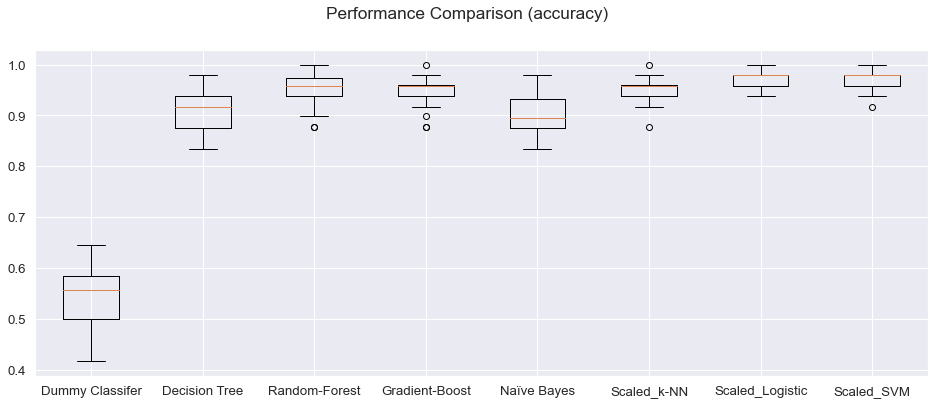

In [47]:
fig = plt.figure(figsize = (16, 6))
fig.suptitle('Performance Comparison (accuracy)')
ax = fig.add_subplot(111)
plt.boxplot(results_acc)
ax.set_xticklabels(names)
plt.show()

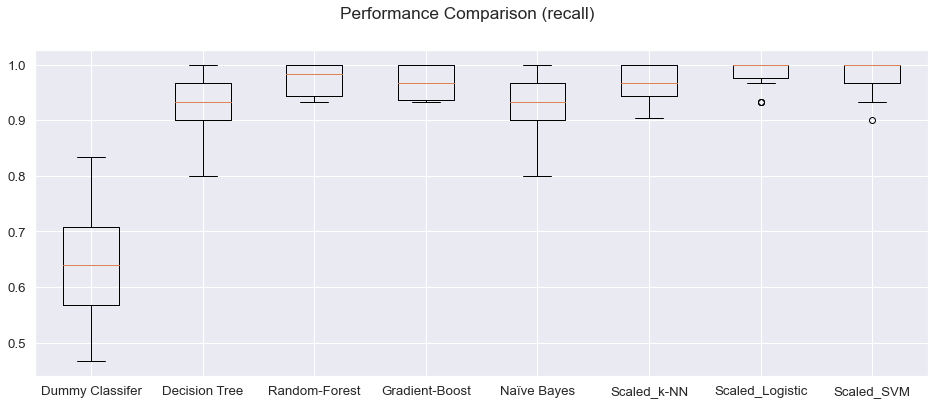

In [48]:
fig = plt.figure(figsize = (16, 6))
fig.suptitle('Performance Comparison (recall)')
ax = fig.add_subplot(111)
plt.boxplot(results_rec)
ax.set_xticklabels(names)
plt.show()

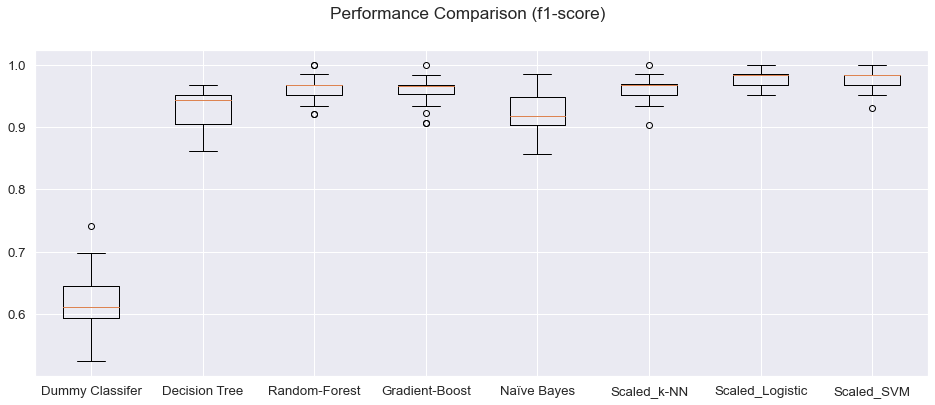

In [49]:
fig = plt.figure(figsize = (16, 6))
fig.suptitle('Performance Comparison (f1-score)')
ax = fig.add_subplot(111)
plt.boxplot(results_f1)
ax.set_xticklabels(names)
plt.show()

## Step 6: Model Finalization

---
### Select the winning algorithm
---

<ins>Main performance metric</ins>:

Our primary goal in this study was to develop a model that classifies cancer tumors as malignant (spreading) or benign (non-spreading). Benign tumors do not contain cancerous cells, are usually not life-threatening, and may not even require treatment, whereas malignant tumors do contain cancerous cells, can be life-threatening, and require treatment. So we understand that labeling a malignant tumor as benign is the worst thing we could do (i.e. having a False Negative would endanger a person's life).

So, it is obvious that false negatives are far too important in our analysis (i.e. we do not want them, or we want as few as possible). As a result, we will base our model evaluation on the <font color='red'><b>recall metric</b></font>, because it is the preferred measure in cases where we want to account for false negatives.

<ins>Algorithm Selection</ins>:

First of all, it was clear that all algorithms far outperformed the dummy classifier. 

Among the classification methods, (Gaussian) Naive Bayes seemed to have the worst performance. In general, Naive Bayes is a very simplistic method and one reason why it did not perform so well, may have been due to violation of the conditional independence assumption for features used in the algorithm. So, we understand that Naïve Bayes was not the best classification method we could use.

Regarding the best performing algorithms, it looked like random forest, gradient boost, k-NN, logistic regression and SVM were the best ones (all above 95% mean accuracy, 96% recall and 96% f1-score). 

Furthermore, we noticed from the above figure that the predictions made with these five methods seemed to be stable (especially for the latter three), as their mean value for both accuracy, recall and F1-score had small standard deviation.

Also, by comparing those boxplots according to their structure and median value, we observed that four of these models (i.e. gradient boost, k-nn, logistic regression and SVM) were negatively skewed (mean<median) with approximately the dispersion, because of their interquartile ranges (i.e. the box lengths).

So, in the overall evaluation of their (mean) performance metrics, logistic regression (using standardized data) appeared to perform the best, while also having the higher "recall" value.

---
### Evaluation of the winning algorithm on the validation set
---

After selecting the winning algorithm, we checked to see if the (mean) performance on the test set was comparable to the performance on the validation set, because in that case, we could be confident that our model works as expected and generalizes well.

The confusion matrix is a way of tabulating the number of misclassifications (i.e. the cases that were classified incorrectly). To create the confusion matrix we imported the confusion_matrix method of metrics class.

Each row of the confusion matrix represents an actual target, while each column represents a predicted target. Each cell (𝑖,i) refers to the number of instances of class 𝑖 that were predicted to be contained in the class. A good classifier will accumulate values on the diagonal. Specifically, if the model had predicted everything perfectly, this would be a diagonal matrix where values off the main diagonal, indicating incorrect predictions, would be zero. 

Below, we showcased a binary confusion matrix, which as can be seen, is composed of squares. The false negatives (FN) and false positives (FP) are samples that were incorrectly classified, while the true negatives (TN) and true positives (TP) are samples that were correctly classified. 

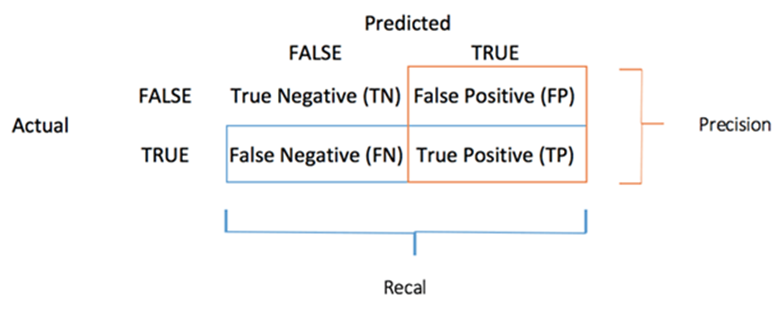

In [50]:
# Feature Scaling
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [51]:
best_model = LogisticRegression()
best_model.fit(x_train_scaled, y_train.values.ravel())
predictions = best_model.predict(x_test_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

In [52]:
######### 1st way:
# import scikitplot as skplt
# skplt.metrics.plot_confusion_matrix(y_test, predictions)
# plt.show()

In [53]:
sort_dict

[('Malignant', 0), ('Benign', 1)]

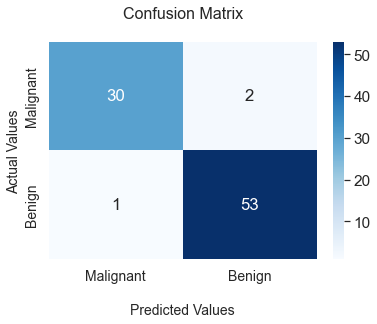

In [54]:
######### 2nd way:
sns.set(font_scale=1.4)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n', fontsize=16);
ax.set_xlabel('\nPredicted Values', fontsize=14)
ax.set_ylabel('Actual Values', fontsize=14);
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Malignant','Benign'], fontsize=14)
ax.yaxis.set_ticklabels(['Malignant','Benign'], fontsize=14)
## Display the visualization of the Confusion Matrix
plt.show()

From the above confusion matrix, we observed that:
* the positive predictive value was 96.3% (=TP/TP+FN), 

* the negative predictive value was 93.7% (=TN/TN+FP) and 

* the overall prediction accuracy value was 96.5% (=(TP+TN)/(TP+TN+FP+FN)).

An interesting outcome was that the benign tumors predicted (i.e. positive predictive value) were higher compared to the predicted malignant tumors (i.e. negative predictive value).

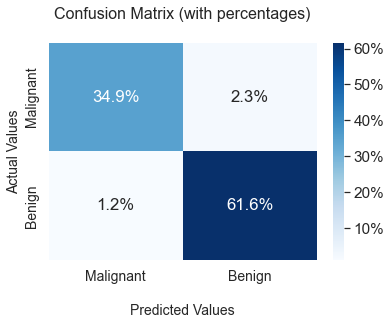

In [55]:
sns.set(font_scale=1.4)
fmt = lambda x,pos: '{:.0%}'.format(x) # for displaying colorbar labels as percentages
ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.1%', cmap='Blues', cbar_kws={'format': FuncFormatter(fmt)})
ax.set_title('Confusion Matrix (with percentages)\n', fontsize=16);
ax.set_xlabel('\nPredicted Values', fontsize=14)
ax.set_ylabel('Actual Values', fontsize=14);
# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Malignant','Benign'], fontsize=14)
ax.yaxis.set_ticklabels(['Malignant','Benign'], fontsize=14)

# Display the visualization of the Confusion Matrix
plt.show()

In [56]:
print('Accuracy of LogisticRegression classifier on training set: {:.2f}'.format(best_model.score(x_train_scaled, y_train.values.ravel())))
print('Accuracy of LogisticRegression classifier on test set: {:.2f}'.format(best_model.score(x_test_scaled, y_test)))

print("\nClassification report for classifier %s:\n%s\n"
      % (best_model, metrics.classification_report(y_test, predictions)))

### print(classification_report(y_test, predictions))

Accuracy of LogisticRegression classifier on training set: 0.98
Accuracy of LogisticRegression classifier on test set: 0.97

Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.96      0.98      0.97        54

    accuracy                           0.97        86
   macro avg       0.97      0.96      0.96        86
weighted avg       0.97      0.97      0.96        86




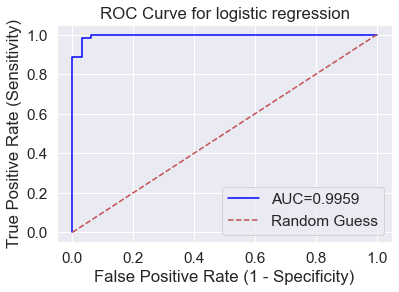

In [57]:
y_score = best_model.fit(x_train_scaled, y_train.values.ravel()).decision_function(x_test_scaled)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
auc = metrics.roc_auc_score(y_test, y_score).round(4)

fig, ax = plt.subplots(1, figsize=(6, 4))
plt.plot(fpr,tpr, color='blue',label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], 'r--',label="Random Guess") # 'r--': red dashed line
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for logistic regression')
plt.legend(loc="lower right")
plt.show()

After implementing the logistic regression algorithm in the validation set, we discovered that the mean of the performance metrics (along with their corresponding standard error) were almost the same as those in the test dataset, thus reassuring us of the method's suitability. 

---
### Train the winning algorithm over the entire dataset
---

In [ ]:
## df.iloc[:,:-1]  # drop last column of dataframe (i.e. target)
## df.iloc[:,-1:]  # select the last column of dataframe  (i.e. target)

In [58]:
sc = StandardScaler()
features_scaled = sc.fit_transform(data_kept.iloc[:,:-1])
best_model32 = LogisticRegression()
best_model32.fit(features_scaled, data_kept.iloc[:,-1:].values.ravel())

LogisticRegression()

---
### Archive the winning model for future use
---

In [59]:
# Save to file in the current working directory (using Pickle)
import pandas

with open("pickle_model.pkl", 'wb') as file:
    pickle.dump(best_model32, file)
    
# Note: We opened a file named "pickle_model.pkl" with the "write bytes mode" ("wb") 
#       and we’ve stored a reference to that file in the variable file.
#       Then, we used the "pickle.dump" method to save the object "best_model32" in the file "pickle_model.pkl". 

In [31]:
# os.listdir()
# We observed that the contents of the working directory now contain a file named "pickle_model.pkl"

In [60]:
# Load the model from file
with open("pickle_model.pkl", 'rb') as file:
    pickle_model = pickle.load(file)
type(pickle_model)

# Note how we opened the file "pickle_model.pkl" with the “read bytes” mode ("rb"), 
# and then stored the reference to that file in the variable "file".
# Then, the pickle.load was able to read the file "pickle_model.pkl"
# and return a new object that is the exact same as the "best_model32" object we originally passed into "pickle.dump".

sklearn.linear_model._logistic.LogisticRegression

As an example to demonstrate how the new "pickle model" object could be used, we loaded it from the file and calculated the accuracy (in the same way that the original "best model32" object could be used).

In [61]:
# Calculate accuracy
score = pickle_model.score(x_test_scaled, y_test)
print("Test score: {0:.2f} %".format(100 * score))
# Predict target values
# predictions_new = pickle_model.predict(x_test_scaled)

Test score: 98.84 %


# Discussion

We discovered that most of the algorithms performed exceptionally well in terms of the performance metrics, which was to be expected given that breast cancer symptoms should exhibit distinct patterns.

As possible enhancements to our analysis, we could try the following:

1) Collect more data

2) Use different sampling technique (e.g. random sampling with replacement - bootstrapping)
> With bootstrapping, the value of the performance metrics will (approximately) be the same, but they would be more stable as the variance of their mean estimation would probably be lower compared to random sampling. The reason for this, lies in the bigger samples because the training set would be set equal to the whole dataset when sampling with replacement, whereas with random split we have selected a proportion of data as the train set, thus we had less information and as a result bigger variance.

3) Fix the (slightly) imbalanced dataset
> * For example we could undersample the benign tumors (i.e., randomly remove rows with benign tumors until we reach a 50/50 ratio of benign/malignant tumors), which however will result it discarding potentially useful data and decreasing even more our small dataset.
* Another way to balance the data, would be to try adding a weight (or bias) for each output class (i.e. class weights) in order to cause our model to "pay more attention" to observations from an under-represented class (i.e., malignant tumors). 
* Another simple approach for handling class imbalance would be to choose an alternative to the default decision threshold.


4) Potential creation of new features or feature transformations such as data discretization (e.g. creating bins of numeric data)

5) Feature Selection per algorithm
> For example, we could have used domain knowledge to choose which variable to keep, apply PCA techniques, LASSO, backward/ forward feature selection, or use a feature selection algorithm (e.g. [scikit learn's feature selection algorithms](https://scikit-learn.org/stable/modules/feature_selection.html)).

6) Apply other classifiers

7) Algorithm Tuning (i.e. find the optimum value for each parameter to improve the model’s performance)
> Considering that we did not tuned the hyper-parameters of our models, the reported performance was good, but not highly optimized. As a result, we could improve the performance of our model by fine tuning their hyper-parameters. For example, we could have utilized the grid search method using 10-fold cross-validation.
